# Acoustic and textual data analysis with Python

This practical work focuses on Python programming language's capabilities in analyzing textual and acoustic data. This practical work will cover the basics of Python programming, key concepts in acoustics and textual data, and how to use Python to analyze these data. By the end of this practical work, you will be able to confidently use Python to analyse acoustics and textual data. More specifically here you will learn the following:

- Python objects and how to effectively use them
- Web-scraping for text, tokenisation and stemming of text, and basic textual feature extraction (tf-idf)
- Audio encodings, conversion of the encodings, and analysis of spectrograms

## Setting up the environment

Before doing anything, we first need to install the packages that are going to be used in this practical work.

In [2]:
!pip install beautifulsoup4==4.11.2
!pip install nltk==3.8.1
!pip install numpy==1.24.1
!pip install pandas==1.5.3
!pip install -U scikit-learn==1.2.1
!pip install ffmpeg-python==0.2.0
!pip install scipy==1.10.0
!pip install matplotlib==3.6.3

## Python basics

It is essential to have a basic understanding of the fundamentals of Python programming for this practical work. Here, you should be familiar with the following concepts:

- Objects (every entity in python refers to an object)
- Variables, functions and control flow


### Exercise 1: Variables
In the code below, we first want the dictionary `b` to have the same values of the dictionary `a`, but be different for the item `0`. However, after writing the function `change_value_for_zero` to do this task, we realise the results are not as expected. How can we fix the code below? Please also add your explanation of the problem as the `explain` variable.

In [1]:
def change_value_for_zero(inp):
    out = inp
    out[0] = "d"
    return out

a = {0:"a", 1:"b", 2:"c"}
b = dict(a)
b = change_value_for_zero(b)

print("a:", a)
print("b:", b)

explain = "the variables a and b are both references to the same dictionary object, therefore any changes made to the dictionnary will appear on both variables"
print("What caused the problem:", explain)

a: {0: 'a', 1: 'b', 2: 'c'}
b: {0: 'd', 1: 'b', 2: 'c'}
What caused the problem: the variables a and b are both references to the same dictionary object, therefore any changes made to the dictionnary will appear on both variables


### Exercise 2: Objects
Here we want to define Python classes for a classroom and its students, to make adding new students to the class easier and more automated. However, we simply do not know how the attributes we consider for each student now will change over time. For example, at first we might only be interested in the student's name, but some time later we might also want to consider the student's hometown. Therefore, the script we write must allow for this variability.

First, we want to write a class to represent the students of different classes called `classroom`. However, here it is used to represent the students of an `NLP class` (look at the `main` function below). We also want this class to be able to write a csv file. The csv file must contain the attributes (id, name, etc.) as colums, and each row represents a student.

**Attention**: the `main` function shall not be changed. The attributes (name, age, town, etc.) shall not be named explicitly in the `classroom` class. The idea is to be able to reuse the `classroom` class for other purposes, avoid `hard-coding` ([see here](https://en.wikipedia.org/wiki/Hard_coding)), and keep the codes `extensible` ([see here](https://en.wikipedia.org/wiki/Extensible_programming)).

In [2]:
import csv
import os

class classroom():
    def __init__(self):
        self.student_list = {}
        self.student_id = 1
    
    def add_student(self, **kwargs):
        self.student_list[self.student_id] = kwargs
        self.student_id += 1
    
    def write_to_csv(self, path):
       
        with open(path, mode='w') as csv_file:
            writer = csv.writer(csv_file)
            for id in self.student_list :
                list = []
                for att in self.student_list[id]:
                    list.append(self.student_list[id][att])
                writer.writerow(list)

def main():
    nlp_class = classroom()
    nlp_class.add_student(name="François")
    nlp_class.add_student(name="Benjamin")
    nlp_class.add_student(name="Didier", age=23)
    nlp_class.add_student(name="Fabien", town="Paris")
    csv_path = "./students.csv"
    nlp_class.write_to_csv(csv_path)
    os.system(f"cat {csv_path}")
    
main()

## Text analysis with python

Text analysis is an increasingly important tool for researchers to gain insight from large amounts of data. Python for text analysis has become extremely popular lately, due to its flexibility and wide range of libraries and packages. In this section we discuss the following:

- web scraping and extracting a specific text
- tokenisation, and stemming the text
- loading text-based datasets
- basic feature extraction for dataset analysis


### Exercise 3: Text analysis basics

Here, we first want to find the `description` in the `meta content` of [UGA website's main page](https://www.univ-grenoble-alpes.fr). Then, we want to automatically analyse its contents. For this purpose, we would like to first tokenise the text, and then find the stems of each word. See [here](https://medium.com/@jeevanchavan143/nlp-tokenization-stemming-lemmatization-bag-of-words-tf-idf-pos-7650f83c60be) and [here](https://dair.ai/notebooks/nlp/2020/03/19/nlp_basics_tokenization_segmentation.html) for more information on the mentioned concepts, as well as practical application.

**help**: You can use the `requests` package to `GET` the contents, and `BeautifulSoup` package to parse the `html`. Also, you can use the `nltk` package for tokenisation and stemming the text.

In [3]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize as wt
from nltk.stem.snowball import FrenchStemmer 
nltk.download('punkt') # to download the tokenisers

def get_text(URL):
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
    results = soup.find("meta", {"name":"description"})
    txt = results.prettify()
    txt = txt.replace("<meta content=\"", "")
    txt = txt.replace("\" name=\"description\"/>", "")
    print(txt)
    return txt

def tokenise_text(txt):
    ''' here we want the output to be a text that puts a space between each token (not a list)
    Write your code here
    '''
    tokenized_txt = " ".join(wt(txt))
    return tokenized_txt

def stem_text(tokenized_txt):
    ''' here we want the output to be a text that puts a space between each stemmed token
    Write your code here
    '''
    french_stemmer = FrenchStemmer()
    text = tokenized_txt.split()
    stemmed_list = [french_stemmer.stem(word) for word in text]
    stemmed_txt = ' '.join(stemmed_list)
    return stemmed_txt

def main():
    txt = get_text("https://www.univ-grenoble-alpes.fr")
    tokenized_txt = tokenise_text(txt)
    stemmed_txt = stem_text(tokenized_txt)
    print("original text:", txt)
    print("tokenized text:", tokenized_txt + "\n")
    print("stemmed text:", stemmed_txt + "\n")

main()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Nous vous offrons tout l’éventail des disciplines universitaires en formation initiale et tout au long de la vie : de la littérature à la physique des particules en passant par l’ingénierie, l'architecture, la politique, la sociologie, la médecine... De quoi construire des parcours de formation riches, flexibles, adaptés aux aspirations de chacun et permettant un accès rapide à l'emploi.

original text: Nous vous offrons tout l’éventail des disciplines universitaires en formation initiale et tout au long de la vie : de la littérature à la physique des particules en passant par l’ingénierie, l'architecture, la politique, la sociologie, la médecine... De quoi construire des parcours de formation riches, flexibles, adaptés aux aspirations de chacun et permettant un accès rapide à l'emploi.

tokenized text: Nous vous offrons tout l ’ éventail des disciplines universitaires en formation initiale et tout au long de la vie : de la littérature à la physique des particules en passant par l ’ in

### Excercise 4: Loading datasets

In this exercise we will learn how to load and analyse textual datasets. Here we will focus on a sentiment analysis dataset, called `Allociné`, which consists of reviews of French television series. These reviews can be positive (labelled `1`) or negative (labelled `0`). Here are your tasks for this excercise:

- Download the corpus
- `Allociné` is divided into three partitions of `train`, `dev`, and `test`. Write a script to load the `train` partition.
- write a script for `get_all_dataset` function below to load training data of the downloaded corpus into the output. You can do it as a numpy array but you are free to do it as you wish.
- write a script for `get_positive_samples` function below to get as input the output of the `get_all_dataset` output, and only output the comments that were positive
- do the same as above for `get_positive_samples` function below, but this time we want the negative comments.
- **Attention**: only the functions can be changed (indicated by `write your code here`), do not change other lines (except for the indices like `[0,1]`, however it is not recommended).

In [6]:
# Downloading the dataset
import os
import urllib.request
import zipfile
import numpy as np
import pandas as pd
dl_path = "http://sentiment.nlproc.org/sentiment-dataset-fr.zip"
urllib.request.urlretrieve(dl_path, 'sentiment-dataset-fr.zip')
with zipfile.ZipFile('sentiment-dataset-fr.zip', 'r') as zip_ref:
    zip_ref.extractall()

#os.system(f"wget {dl_path}")
#os.system(f"unzip ./sentiment-dataset-fr.zip")

In [7]:

def get_all_dataset(path):
    train_data = pd.read_csv(path, sep='\t')
    new_columns = ["score", "review"]
    train_data.append(pd.DataFrame(train_data.columns))
    train_data.columns = new_columns
    return train_data

def get_positive_samples(data):
    positives = data[data['score']==1]
    return positives
    
def get_negative_samples(data):
    negatives = data[data['score']==0]
    return negatives

train_data = get_all_dataset("./fr/train.tsv")
train_data_positives = get_positive_samples(train_data)
train_data_negatives = get_negative_samples(train_data)

print("An example of a negative comment:\n", train_data_negatives.sample(n=1))
print("An example of a positive comment:\n", train_data_positives.sample(n=1))

An example of a negative comment:
     score                                             review
24      0  comment regarder ça jusqu'à la fin ? 5 minutes...
An example of a positive comment:
       score                                             review
1069      1  une série qui n'a pas grand chose d'innovant ,...


C:\Users\akram\AppData\Local\Temp\ipykernel_24060\3189262476.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data.append(pd.DataFrame(train_data.columns))


### Excercise 5: Basic feature extraction

After loading the dataset, we want to see if we can somehow use each word to automatically distinguish between positive and negative comments. Automatic detection of negativity/positivity from text is called sentiment analysis, and it has many applications, especially in marketing campaigns and product analysis. The first step of such task, is to represent the text numerically in a way that is useful for sentiment analysis. Traditionally, a method called tf-idf is used to extract word-based features from different documents. tf–idf (also TF*IDF, TFIDF, TF–IDF, or Tf–idf), short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus, and is usually used in information retrieval (from [wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)). [See here](https://monkeylearn.com/blog/what-is-tf-idf/) for more information on tf-idf and its applications for machine learning.

In this excercise, we would like to extract numerical vectors to represent each word using the tf–idf method. In the code section below, 

- Using `TfidfVectorizer`, write a function that would get the training partition of the `Allociné` corpus, and applies the tf–idf. you can look at its documentation to see how to transform the text into tf-idf features. Be careful that the type of the output of this function can be different than a list or array, but one can use `.toarray()` to change the type to `numpy array` so that it is easier to work with.
- Transform the `Allociné`'s training partition to represent the stems of each word. Then apply tf-idf to the "stemmed" corpus.
- Then, explain which set of tf-idf features you prefer to use? the one from the original text of `Allociné` corpus, or its stemmed version? Explain why.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_vectorizer(corpus):
    vectorizer = TfidfVectorizer()
    _ = vectorizer.fit_transform(corpus)
    return vectorizer

def get_tfidf_of_words(text, vectorizer):
    tf_idfs = vectorizer.transform([text]).toarray()
    return tf_idfs    

corpus = train_data.review.values # you can also change this line
vectorizer = get_vectorizer(corpus)
tokenised_corpus = [tokenise_text(txt) for txt in corpus]
stemmed_corpus = [stem_text(txt) for txt in tokenised_corpus]
vectorizer_stemmed = get_vectorizer(stemmed_corpus)

example = corpus[0]
example_stemmed = stemmed_corpus[0]
tf_idfs = get_tfidf_of_words(example, vectorizer)
tf_idfs_stemmed = get_tfidf_of_words(example_stemmed, vectorizer_stemmed)

print("original text: ", example , "\n")
print("Tf-idf of the original text: ", tf_idfs , "\n")
print("stemmed text: ", example_stemmed , "\n")
print("Tf-idf of the stemmed text: ", tf_idfs_stemmed, "\n")

explain = "While stemming can help capture the essence of a text and reduce the impact of noise and redundancy in the data, in the case of sentiment analysis it can be a bit counterproductive, as it may be important to distinguish between words that have different meanings depending on the tense or the conjugation, (eg love/loved)"
print("Which set of tf-idf would you choose as features (from stemmed or original text) and why?", explain)


original text:  série inintéressante banale le scénario est décevant et on ne rentre pas du tout dans la série . 

Tf-idf of the original text:  [[0. 0. 0. ... 0. 0. 0.]] 

stemmed text:  ser inintéress banal le scénario est décev et on ne rentr pas du tout dan la ser . 

Tf-idf of the stemmed text:  [[0. 0. 0. ... 0. 0. 0.]] 

Which set of tf-idf would you choose as features (from stemmed or original text) and why? While stemming can help capture the essence of a text and reduce the impact of noise and redundancy in the data, in the case of sentiment analysis it can be a bit counterproductive, as it may be important to distinguish between words that have different meanings depending on the tense or the conjugation, (eg love/loved)


### Excercise 6: Text analysis

Here, we want to see if there is a correlation between the `tf-idf` of each word and the sentiment labels. Fill in the function below to get the first `30` words with the most `tf-idf` values, for the positive and negative comments separately. Do you see a correlation between the words used and the sentiment labels?

In [17]:
def get_most_repeated(data, vectorizer):
    corpus = data.review.values
    tf_idf = vectorizer.transform(corpus).toarray()[0]
    names = vectorizer.get_feature_names_out()
    words_dict = {names[i] : tf_idf[i] for i in range(len(tf_idf))}
    words_dict = dict(sorted(words_dict.items(), key=lambda item: item[1], reverse=True))
    i = 0
    words = {}
    for word in words_dict:
        words[word] = words_dict[word]
        i += 1
        if i == 30 :
            break
    return words
    
positive_words = get_most_repeated(train_data_positives, vectorizer)
negative_words = get_most_repeated(train_data_negatives, vectorizer)
print("positive words with the most tf-idf values:", positive_words, '\n')
print("negative words with the most tf-idf values:", negative_words, '\n')

explain = "we can see that the words with the highest tf-idf values for the positive reviews are words with positive meaning (adorée, géniale...) whereas the opposite is true for the negative reviews, this correlation could help determine wether a review is positive or not, although we have quite a bit of noise since there's a big number of neutral terms with high tf-idf values "
print("Do you see a correlation of the words with the most tf-idf values, and sentiment labels?", explain)

positive words with the most tf-idf values: {'adorée': 0.4383412526449705, 'regardée': 0.37082573782389927, 'jeune': 0.33786426299387173, 'étais': 0.31944264987873994, 'ai': 0.3103181706858641, 'première': 0.258588192147841, 'était': 0.2463788523291949, 'géniale': 0.23738727334277296, 'quand': 0.22243546429778144, 'elle': 0.17665222615189247, 'vraiment': 0.15637030468929014, 'plus': 0.14197877562083036, 'je': 0.11689161941291214, 'que': 0.11213350665173823, 'la': 0.09419462772837794, 'est': 0.08497606329414141, 'série': 0.07940120971830981, '00': 0.0, '0001': 0.0, '02x02': 0.0, '04': 0.0, '05': 0.0, '06': 0.0, '09': 0.0, '10': 0.0, '100': 0.0, '1000': 0.0, '11': 0.0, '11h30': 0.0, '12': 0.0} 

negative words with the most tf-idf values: {'inintéressante': 0.43651048494643147, 'rentre': 0.43651048494643147, 'banale': 0.4097456108797485, 'décevant': 0.3941415163494285, 'scénario': 0.23217047344122815, 'série': 0.1869312565134413, 'dans': 0.18194107729142767, 'du': 0.17748925800712387, 't

## Acoustic signal analysis with Python

Acoustic signal analysis is a powerful tool used to extract meaningful information from acoustic recordings. Here, we cover the following topics:

- Different audio encodings and conversion
- Analysing acoustic recordings with spectrograms


In [120]:
# Downloading two audio recordings to analyse
dl_path = 'https://cdn.pixabay.com/download/audio/2023/01/09/audio_baaa3cfec7.mp3?filename=acoustic-guitar-loop-f-91bpm-132687.mp3'
os.system(f"curl {dl_path} --compressed -o guitar.mp3")
dl_path = "https://cdn.pixabay.com/download/audio/2022/03/15/audio_3e683188e5.mp3?filename=tooheavy-77056.mp3"
os.system(f"curl {dl_path} --compressed -o speech.mp3")

2

### Excercise 7: Audio encodings

Below, write a script to convert the `.mp3` files to `.wav` files formatted as `PCM signed 16-bit little-endian`. We would also like to have the file as `mono`, so that they only contain one channel. Last but not the least, change the sampling frequency of the files to `16000 Hz`. After writting the script, explain the questions asked in the code section below.

In [23]:
def convert_audio(input_path, output_path):
    args = '-acodec pcm_s16le -ar 44100 -ac 1'
    os.system(f'ffmpeg -i {input_path} {args} -y {output_path}')

convert_audio("guitar.mp3", "guitar_converted.wav")
convert_audio("speech.mp3", "speech_converted.wav")

explain = "\nMP3 files use lossy compression algorithms to remove parts of the audio that are less noticeable to the human ear which gives them a smaller size but lower quality and dynamic range. PCM formatted WAV files, on the other hand, are uncompressed audio files that retain all the audio data in the original recording"
print("What is the difference between mp3, and PCM formatted wav file?", explain, '\n')

explain = "\nsampling frequency : number of samples of audio data taken per second | bitrate = the number of bits used to represent each sample in the audio file"
print("What is the sampling frequency, its difference with bit-rate?", explain, '\n')

explain = "\nA sampling frequency of 16 kHz is commonly used for speech signal analysis and machine learning models for speech recognition because it provides a high level of detail in the signal while still keeping the file size manageable. At 16 kHz, the Nyquist frequency, which is the highest frequency that can be accurately represented by the digital audio, is 8 kHz, which is well above the frequency range of human speech. This means that the audio can be accurately captured and analyzed without losing any important information."
print("Analysing speech signals, and building machine learning models to recognise human speech are often done with 16KHz sampled audio files. Why do you think that is the case ?", explain, '\n')


What is the difference between mp3, and PCM formatted wav file? 
MP3 files use lossy compression algorithms to remove parts of the audio that are less noticeable to the human ear which gives them a smaller size but lower quality and dynamic range. PCM formatted WAV files, on the other hand, are uncompressed audio files that retain all the audio data in the original recording 

What is the sampling frequency, its difference with bit-rate? 
sampling frequency : number of samples of audio data taken per second | bitrate = the number of bits used to represent each sample in the audio file 

Analysing speech signals, and building machine learning models to recognise human speech are often done with 16KHz sampled audio files. Why do you think that is the case ? 
A sampling frequency of 16 kHz is commonly used for speech signal analysis and machine learning models for speech recognition because it provides a high level of detail in the signal while still keeping the file size manageable. At 1

### Excercise 8: Normalisation

It is a common practice to normalise the wav signal to contain values between zero and one. Write a very short script (can be one line) to normalise the wav file after `reading` it.

In [29]:
import scipy.io.wavfile as wav

def normalise_signal(sig):
    sig_normed = sig/max(sig)
    return sig_normed

(rate,sig) = wav.read("guitar_converted.wav")
sig_normed = normalise_signal(sig)
print("original signal values:", sig[995:1000])
print("normalised signal values", sig_normed[995:1000])

original signal values: [-973 -806 -952 -846 -774]
normalised signal values [-0.08958659 -0.07421048 -0.08765307 -0.07789338 -0.07126416]


### Excercise 9: Spectrograms

Below, we use the `matplotlib` package to plot the spectrograms of the two acoustic signals (we plot only the first three seconds for the image to be more clear). A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time (from [wikipedia](https://en.wikipedia.org/wiki/Spectrogram)). After running the code below to plot the spectrograms, answer the following questions.

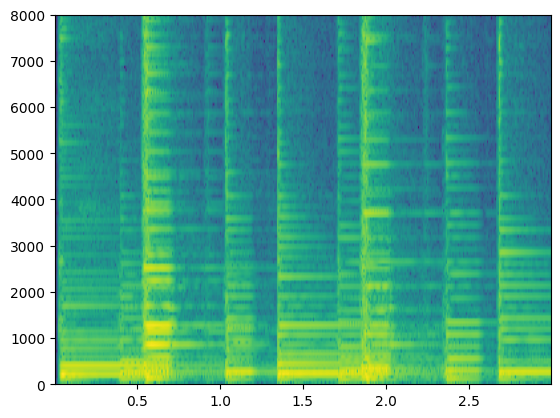

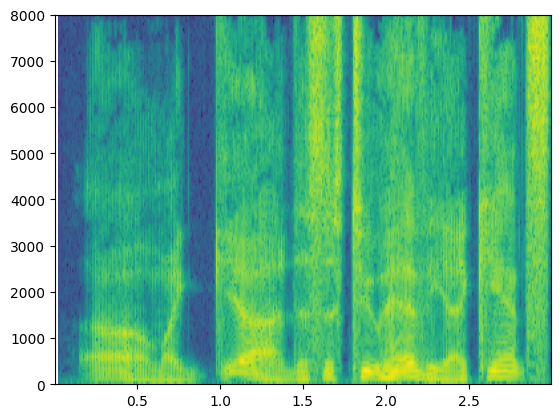

From the spectrograms, how can you tell which one is human speech, and which one is guitar sound? we can visually distinguish between the two
Try changing the value of NFFT, what change do you observe? why is that? As we increase the NFFT value, we notice that the we are better able to distinguish between more closely spaced frequencies, since there are more frequency bins being computed.


In [37]:
import matplotlib.pyplot as plt

(rate,sig) = wav.read("guitar_converted.wav")
spc, f, t, img = plt.specgram(sig[:rate*3], Fs=rate, NFFT=256) #spc, f, t, img
plt.show()

(rate,sig) = wav.read("speech_converted.wav")
spc, f, t, img = plt.specgram(sig[:rate*3], Fs=rate, NFFT=256) #spc, f, t, img
plt.show()

explain = "we can visually distinguish between the two"
print("From the spectrograms, how can you tell which one is human speech, and which one is guitar sound?", explain)

explain = "As we increase the NFFT value, we notice that the we are better able to distinguish between more closely spaced frequencies, since there are more frequency bins being computed."
print("Try changing the value of NFFT, what change do you observe? why is that?", explain)


## Summary

In this practical work, the basics of acoustic and textual data analysis with Python have been explored. First, the fundamentals of Python were covered, focusing on classes and how to write clean codes. Then, the basics of text analysis were discussed, including downloading datasets and extracting basic features such as `tf-idf`. Finally, acoustic signal analysis with Python was discussed, focusing on audio encodings, conversion of the encodings, and acoustic analysis of different sounds with `spectrograms`. 